In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nx, ny = 32, 32 # 差分格子点数
dx, dy = 0.5e-6, 0.5e-6 # 差分格子点の間隔[m]
eee = 1.0e+6
gamma = 1.0 # 界面エネルギー[J/m^2]
delta = 4.*dx # 界面幅[m]
amobi = 4.e-14 # 界面のモビリティ[m^4/(Js)] 
ram = 0.1 
bbb = 2.*np.log((1.+(1.-2.*ram))/(1.-(1.-2.*ram)))/2.  

In [3]:
aaa   = np.sqrt(3.*delta*gamma/bbb) # 勾配エネルギー係数
www   = 6.*gamma*bbb/delta # エネルギー障壁の高さ
pmobi = amobi*np.sqrt(2.*www)/(6.*aaa) # フェーズフィールドモビリティ

In [4]:
dt = dx*dx/(5.*pmobi*aaa*aaa)/2 # 時間増分[s]
nsteps = 1000 # 時間ステップ数の総数

In [5]:
p  = np.zeros((nx,ny)) # 時刻tでのフェーズフィールド変数の配列
p_new  = np.zeros((nx,ny)) # 時刻t+dtでのフェーズフィールド変数の配列

In [6]:
r_nuclei = 5.*dx 
for i in range(nx):
    for j in range(ny):
        r = np.sqrt( (i *dx)**2 +(j*dy)**2 ) - r_nuclei
        p[i,j] = 0.5*(1.-np.tanh(np.sqrt(2.*www)/(2.*aaa)*r)) # フェーズフィールド変数の初期分布の設定

nstep =  0


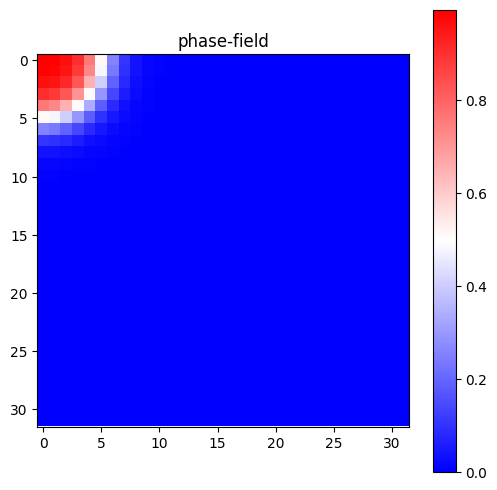

nstep =  100


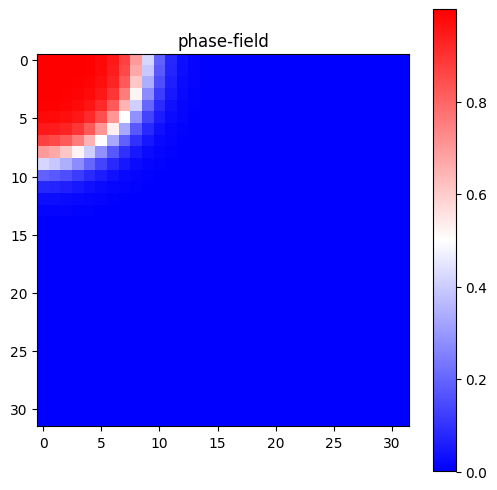

nstep =  200


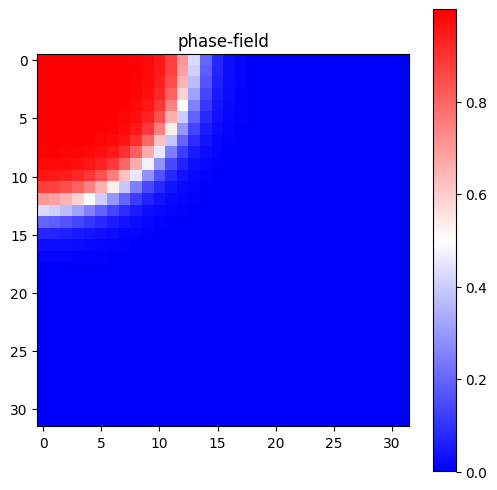

nstep =  300


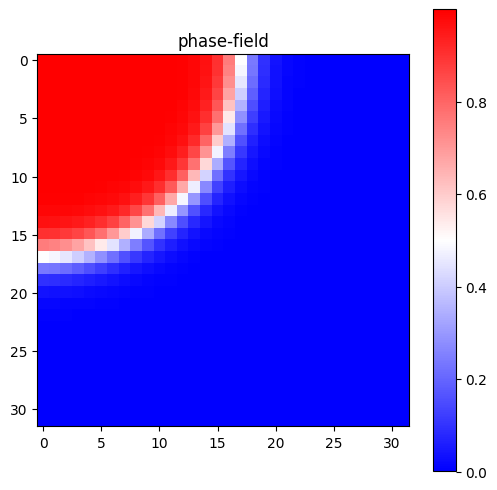

nstep =  400


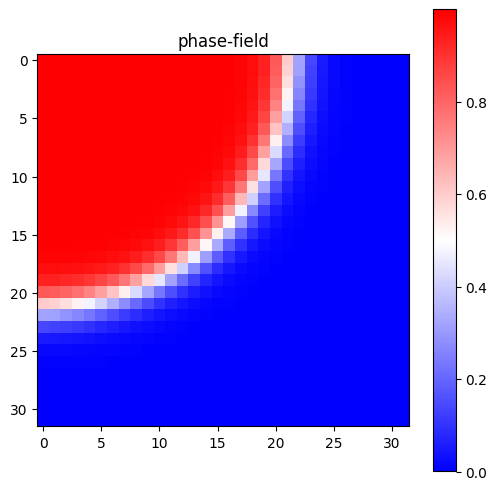

nstep =  500


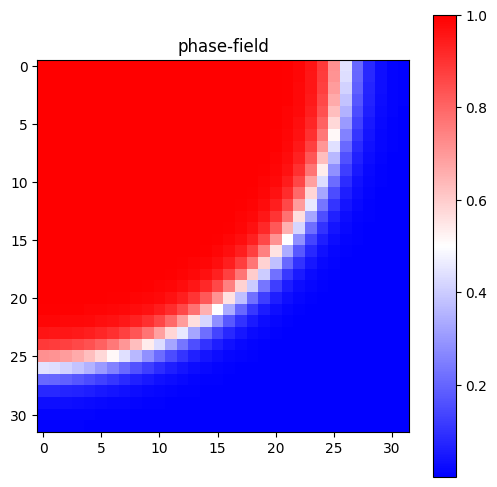

nstep =  600


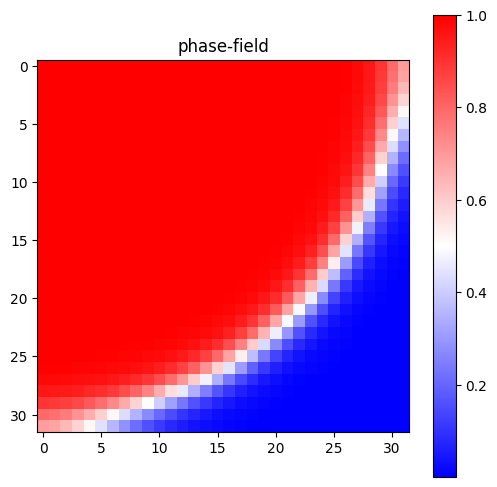

nstep =  700


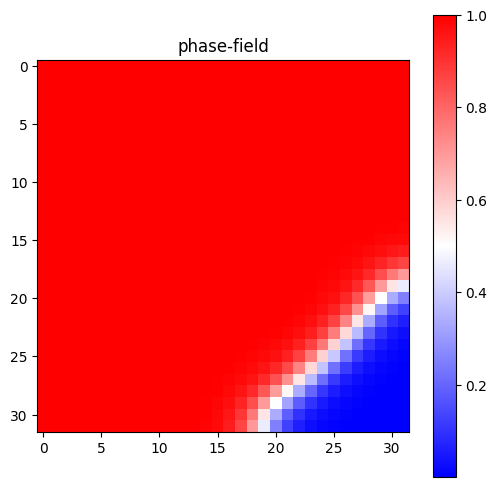

nstep =  800


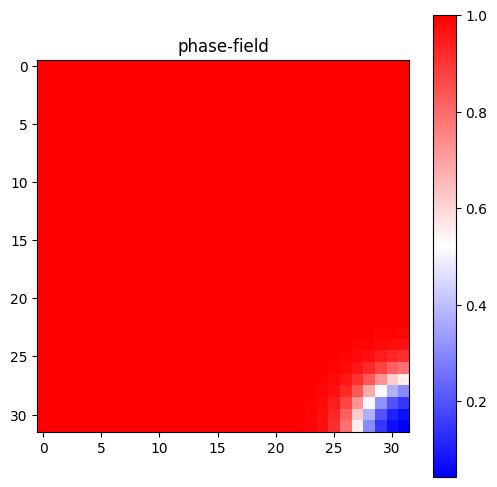

nstep =  900


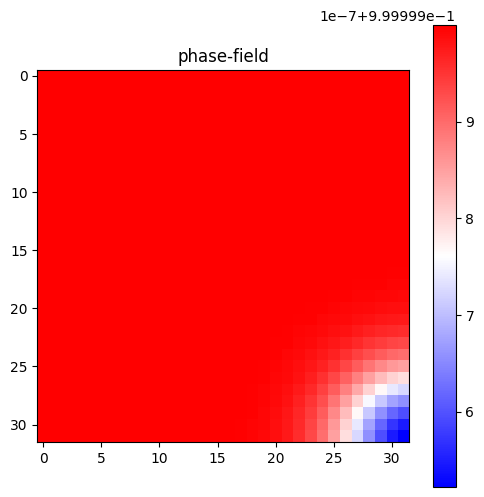

nstep =  1000


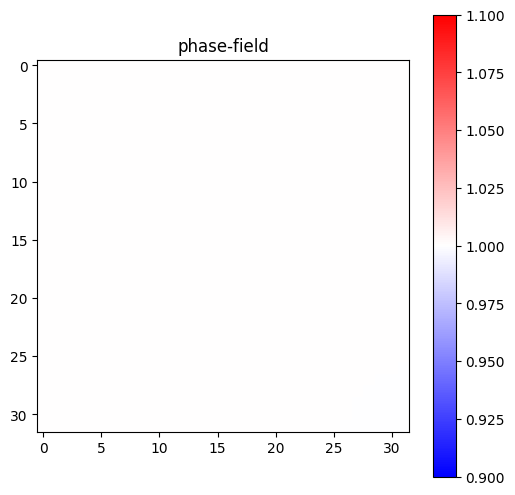

In [7]:
for t in range(nsteps+1):
    for j in range(ny):
        for i in range(nx):
            ip = i + 1
            im = i - 1
            jp = j + 1
            jm = j - 1
            if ip > nx - 1:
                ip = nx -1
            if im < 0:
                im = 0
            if jp > ny - 1:
                jp = ny -1
            if jm < 0:
                jm = 0
            p_new[i,j] = p[i,j] + pmobi * ( 4.*www*p[i,j]*(1.-p[i,j])*(p[i,j]-0.5+3./(2.*www)*eee)+  aaa*aaa*((p[ip,j] - 2*p[i,j] + p[im,j])/dx/dx + (p[i,jp] - 2*p[i,j] + p[i,jm])/dy/dy) ) * dt

    p[:,:] = p_new[:,:] 

    if t % 100 == 0:
      print('nstep = ', t)
      plt.figure(figsize=(6,6))
      plt.imshow(p, cmap='bwr')        
      plt.title('phase-field')
      plt.colorbar()
      plt.show() 